In [18]:
import pandas as pd
import numpy as np

data = pd.read_csv('df_aragon.csv')
data.head()

,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Coordenadas_gps,Anio_emision,Dias_hasta_expiracion
0,2013-06-29,2023-06-29,30.11,E,142.33,E,Vivienda individual,Existente,1962,49.0,ZARAGOZA,ZARAGOZA,"674903,68 , 4612931,37",2013,3652
1,2013-09-26,2023-09-26,46.06,E,174.42,E,Vivienda individual,Existente,1974,81.0,ZARAGOZA,ZARAGOZA,"674062,96 , 4612970,24",2013,3652
2,2014-02-26,2024-02-26,20.30,D,94.16,D,Vivienda individual,Existente,1999,72.0,ZARAGOZA,ZARAGOZA,"671872,34 , 4612101,81",2014,3652
3,2013-06-12,2023-06-12,39.21,E,187.66,E,Vivienda individual,Existente,1970,65.0,ZARAGOZA,ZARAGOZA,"676128,95 , 4613401,52",2013,3652
4,2013-06-27,2023-06-27,103.75,G,409.03,G,Vivienda individual,Existente,1965,46.0,ZARAGOZA,ZARAGOZA,"674806,83 , 4613067,64",2013,3652


In [19]:
#Análisis inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179852 entries, 0 to 179851
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Fecha_emision            179852 non-null  object 
 1   Fecha_expiracion         179852 non-null  object 
 2   Emision_CO2              179852 non-null  float64
 3   Clasificacion_Emisiones  179852 non-null  object 
 4   ConsumoKWh/m2/Anio       179852 non-null  float64
 5   Clasificacion_consumo    179852 non-null  object 
 6   Tipo_edificio            179852 non-null  object 
 7   Estado_edificio          179852 non-null  object 
 8   Anio_construccion        179852 non-null  int64  
 9   Superficie_m2            179852 non-null  float64
 10  Municipio                179852 non-null  object 
 11  Provincia                179852 non-null  object 
 12  Coordenadas_gps          179852 non-null  object 
 13  Anio_emision             179852 non-null  int64  
 14  Dias

In [20]:
data['Fecha_emision'] = pd.to_datetime(data['Fecha_emision'], errors='coerce')
data['Fecha_expiracion'] = pd.to_datetime(data['Fecha_expiracion'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179852 entries, 0 to 179851
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Fecha_emision            93324 non-null   datetime64[ns]
 1   Fecha_expiracion         179852 non-null  datetime64[ns]
 2   Emision_CO2              179852 non-null  float64       
 3   Clasificacion_Emisiones  179852 non-null  object        
 4   ConsumoKWh/m2/Anio       179852 non-null  float64       
 5   Clasificacion_consumo    179852 non-null  object        
 6   Tipo_edificio            179852 non-null  object        
 7   Estado_edificio          179852 non-null  object        
 8   Anio_construccion        179852 non-null  int64         
 9   Superficie_m2            179852 non-null  float64       
 10  Municipio                179852 non-null  object        
 11  Provincia                179852 non-null  object        
 12  Coordenadas_gps 

In [21]:
data.columns

Index(['Fecha_emision', 'Fecha_expiracion', 'Emision_CO2',
       'Clasificacion_Emisiones', 'ConsumoKWh/m2/Anio',
       'Clasificacion_consumo', 'Tipo_edificio', 'Estado_edificio',
       'Anio_construccion', 'Superficie_m2', 'Municipio', 'Provincia',
       'Coordenadas_gps', 'Anio_emision', 'Dias_hasta_expiracion'],
      dtype='object')

In [23]:
#Asumiendo Preprocesamiento de datos
#Quitar info "innecesaria"
quitar = ['Fecha_emision', 'Fecha_expiracion',
       'Municipio', 'Provincia', 'Coordenadas_gps',
       'Anio_emision', 'Dias_hasta_expiracion' ]
data.drop(columns=quitar, inplace=True)
print("Características a usar: ")
print(data.columns)

Características a usar: 
Index(['Emision_CO2', 'Clasificacion_Emisiones', 'ConsumoKWh/m2/Anio',
       'Clasificacion_consumo', 'Tipo_edificio', 'Estado_edificio',
       'Anio_construccion', 'Superficie_m2'],
      dtype='object')


In [24]:
#Eliminamos datos registros con datos faltantes
data.dropna(inplace=True) #No recomendado en problemas no demostrativos

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179852 entries, 0 to 179851
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Emision_CO2              179852 non-null  float64
 1   Clasificacion_Emisiones  179852 non-null  object 
 2   ConsumoKWh/m2/Anio       179852 non-null  float64
 3   Clasificacion_consumo    179852 non-null  object 
 4   Tipo_edificio            179852 non-null  object 
 5   Estado_edificio          179852 non-null  object 
 6   Anio_construccion        179852 non-null  int64  
 7   Superficie_m2            179852 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 11.0+ MB


In [26]:
#Cambio de variables
data = pd.get_dummies(data, drop_first=True)
data.head()

,Emision_CO2,ConsumoKWh/m2/Anio,Anio_construccion,Superficie_m2,Clasificacion_Emisiones_B,Clasificacion_Emisiones_C,Clasificacion_Emisiones_D,Clasificacion_Emisiones_E,Clasificacion_Emisiones_F,Clasificacion_Emisiones_G,...,Clasificacion_consumo_E,Clasificacion_consumo_F,Clasificacion_consumo_G,Tipo_edificio_Edificio completo,Tipo_edificio_Local,Tipo_edificio_Unifamiliar,Tipo_edificio_Vivienda individual,Estado_edificio_Obra Terminada,Estado_edificio_Proyecto Nueva Construcción,Estado_edificio_Proyecto Reforma
0,30.11,142.33,1962,49.0,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
1,46.06,174.42,1974,81.0,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
2,20.30,94.16,1999,72.0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,39.21,187.66,1970,65.0,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,103.75,409.03,1965,46.0,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False


In [30]:
#Escalar los valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columnas_escalado = ['Emision_CO2', 'ConsumoKWh/m2/Anio',
       'Anio_construccion', 'Superficie_m2']
data[columnas_escalado] = scaler.fit_transform(data[columnas_escalado])

In [32]:
#Modelo
#Dividir nuestro conjunto de entrenamiento y validación
from sklearn.model_selection import train_test_split

X = data.drop('Emision_CO2', axis=1)
y = data['Emision_CO2']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#modelos de regresión (Lineal, Lasso, Ridge y RFR)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [35]:
modelo = LinearRegression()
modelo.fit(xtrain, ytrain)
y_pred_lineal = modelo.predict(xtest)

modelo = Lasso(alpha=0.1)
modelo.fit(xtrain, ytrain)
y_pred_lasso = modelo.predict(xtest)

modelo = Ridge(alpha=0.1)
modelo.fit(xtrain, ytrain)
y_pred_ridge = modelo.predict(xtest)

modelo = RandomForestRegressor(n_estimators=50)
modelo.fit(xtrain, ytrain)
y_pred_rfr = modelo.predict(xtest)

In [37]:
#Evaluación con métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lineal = mean_absolute_error(ytest, y_pred_lineal)
mse_lineal = mean_squared_error(ytest, y_pred_lineal)
r2_lineal = r2_score(ytest, y_pred_lineal)

mae_lasso = mean_absolute_error(ytest, y_pred_lasso)
mse_lasso = mean_squared_error(ytest, y_pred_lasso)
r2_lasso = r2_score(ytest, y_pred_lasso)

mae_ridge = mean_absolute_error(ytest, y_pred_ridge)
mse_ridge = mean_squared_error(ytest, y_pred_ridge)
r2_ridge = r2_score(ytest, y_pred_ridge)


mae_rfr = mean_absolute_error(ytest, y_pred_rfr)
mse_rfr = mean_squared_error(ytest, y_pred_rfr)
r2_rfr = r2_score(ytest, y_pred_rfr)

print(f"Lineal - MAE: {mae_lineal:.2f}, MSE: {mse_lineal:.2f}, R2: {r2_lineal:.2f}")
print(f"Lasso - MAE: {mae_lasso:.2f}, MSE: {mse_lasso:.2f}, R2: {r2_lasso:.2f}")
print(f"Ridge - MAE: {mae_ridge:.2f}, MSE: {mse_ridge:.2f}, R2: {r2_ridge:.2f}")
print(f"Random Forest Regressor - MAE: {mae_rfr:.2f}, MSE: {mse_rfr:.2f}, R2: {r2_rfr:.2f}")


Lineal - MAE: 0.36, MSE: 0.36, R2: 0.65
Lasso - MAE: 0.56, MSE: 0.67, R2: 0.33
Ridge - MAE: 0.36, MSE: 0.36, R2: 0.65
Random Forest Regressor - MAE: 0.13, MSE: 0.08, R2: 0.92


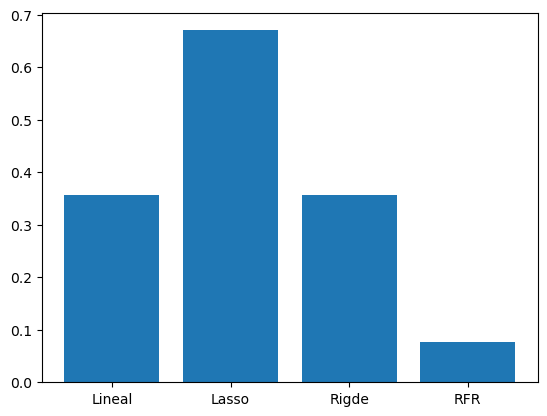

In [38]:
mse_resultados = [mse_lineal, mse_lasso, mse_ridge, mse_rfr]
mae_resultados = [mae_lineal, mae_lasso, mae_ridge, mae_rfr]

modelos = ["Lineal", 'Lasso', 'Rigde', 'RFR']

import matplotlib.pyplot as plt
plt.bar(modelos, mse_resultados)
plt.show()

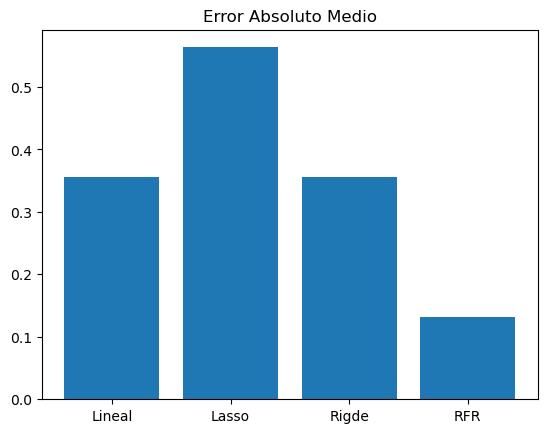

In [39]:
mae_resultados = [mae_lineal, mae_lasso, mae_ridge, mae_rfr]

modelos = ["Lineal", 'Lasso', 'Rigde', 'RFR']

import matplotlib.pyplot as plt
plt.bar(modelos, mae_resultados)
plt.title("Error Absoluto Medio")
plt.show()